In [1]:
import scanpy as sc 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path = '../SourceData/Extended_Figure8/'

In [3]:
st_ad = sc.read_h5ad(data_path + 'st_ad_all.h5ad')

/opt/anaconda3/envs/graphene_electro_seq/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/anaconda3/envs/graphene_electro_seq/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/anaconda3/envs/graphene_electro_seq/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/anaconda3/envs/graphene_electro_seq/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/anaconda3/envs/graphene_electro_seq/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encounter

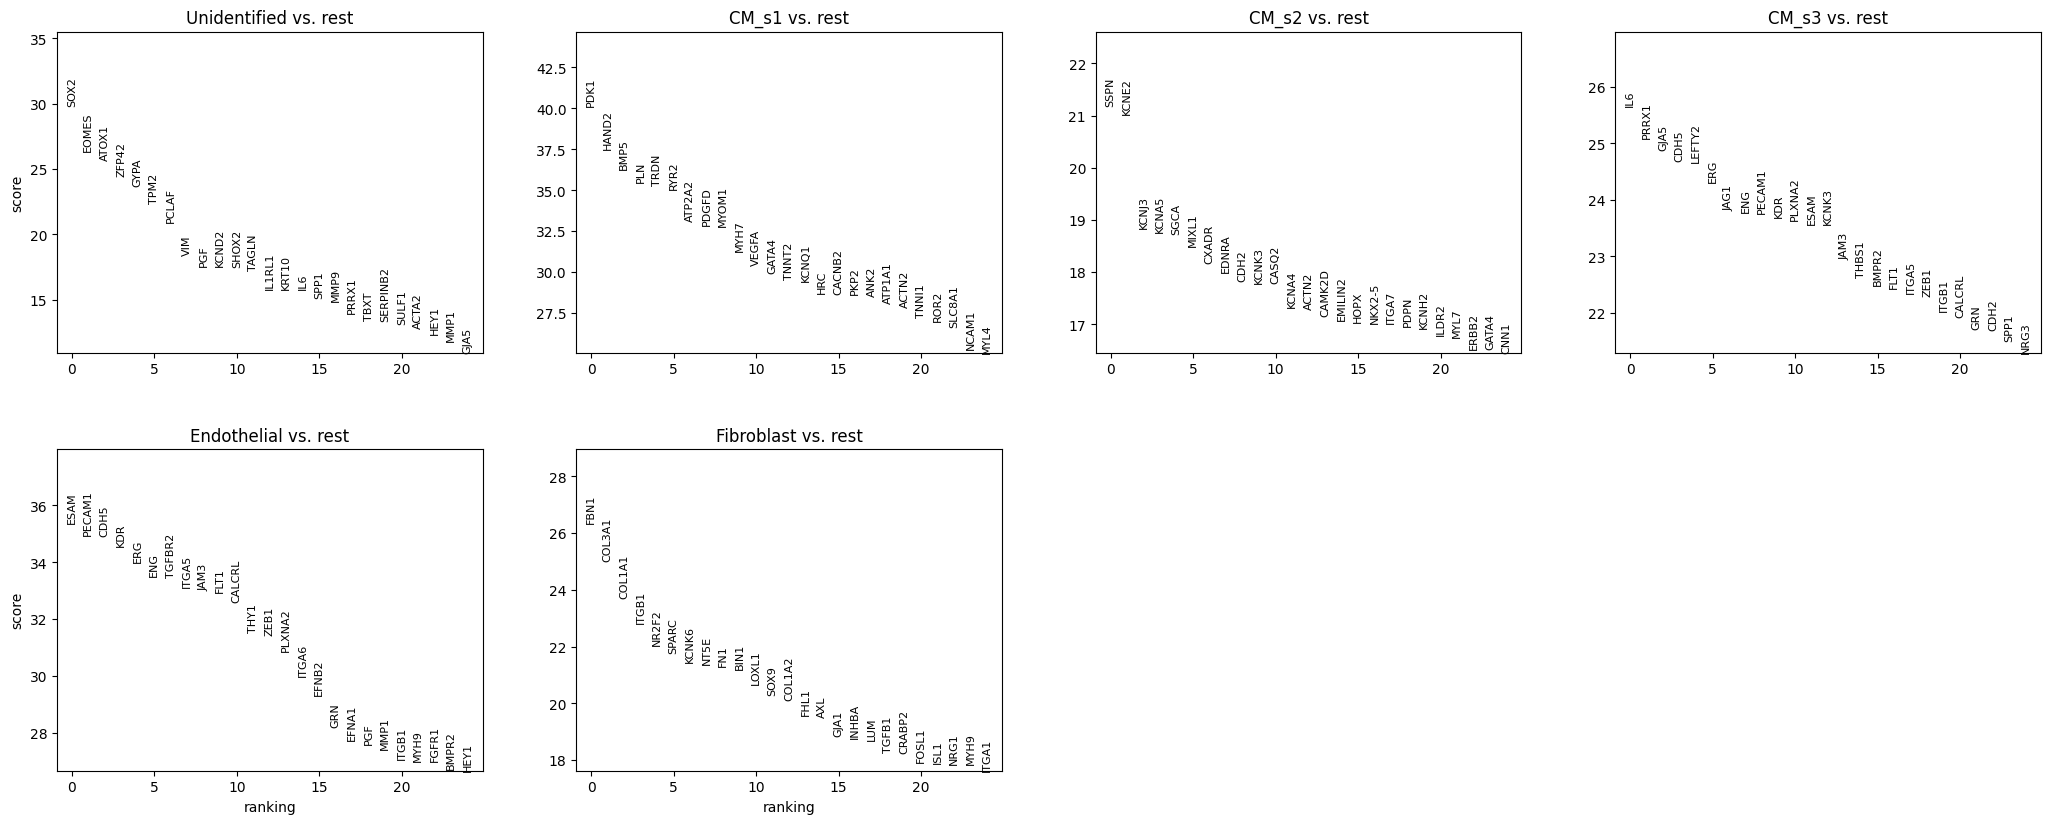

In [5]:
sc.tl.rank_genes_groups(st_ad, groupby='cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(st_ad, n_genes=25, sharey=False)

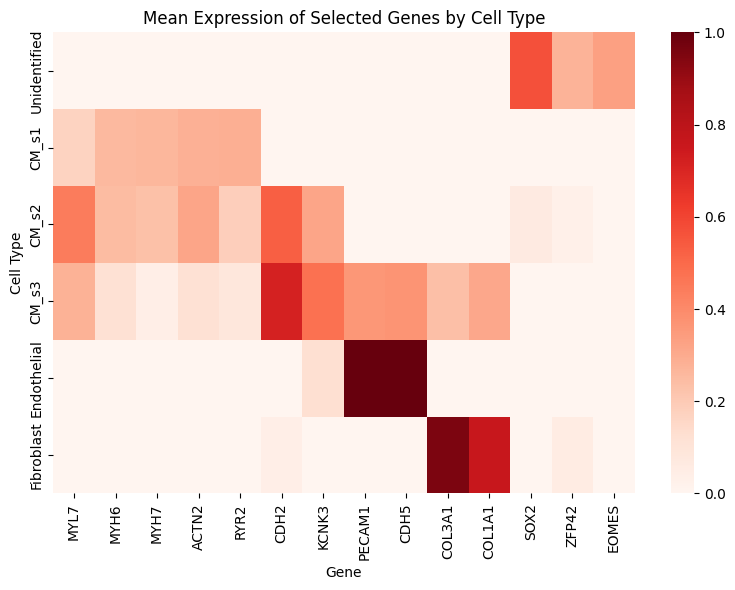

In [6]:
genes = ['MYL7','MYH6','MYH7','ACTN2','RYR2', 'CDH2', 'KCNK3', 'PECAM1', 'CDH5', 'COL3A1', 'COL1A1', 'SOX2', 'ZFP42', 'EOMES']

expr = st_ad[:, genes].to_df()
expr['cell_type'] = st_ad.obs['cell_type'].values

mean_expr = expr.groupby('cell_type')[genes].mean()

plt.figure(figsize=(8, 6))
sns.heatmap(mean_expr, cmap="Reds", vmin=-0, vmax=1)
plt.title('Mean Expression of Selected Genes by Cell Type')
plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.tight_layout()
plt.show()